In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [7]:
files = glob.glob('*.ddf')

In [8]:
files

['channel 3 20191001 000034 00001.ddf',
 'channel 4 20191001 000134 00001.ddf',
 'channel 2 20191001 000335 00001.ddf',
 'channel 1 20191001 000235 00001.ddf']

In [56]:
def cleanup(df):
    df = df[df['length (m)']>0]
    df = df[df['length (m)']<420]
    df = df[df['temperature (°C)']>5]
    df = df.set_index('length (m)')
    return df

In [10]:
files

['channel 3 20191001 000034 00001.ddf',
 'channel 4 20191001 000134 00001.ddf',
 'channel 2 20191001 000335 00001.ddf',
 'channel 1 20191001 000235 00001.ddf']

In [20]:
int(files[0][8]) % 2 == 0 

False

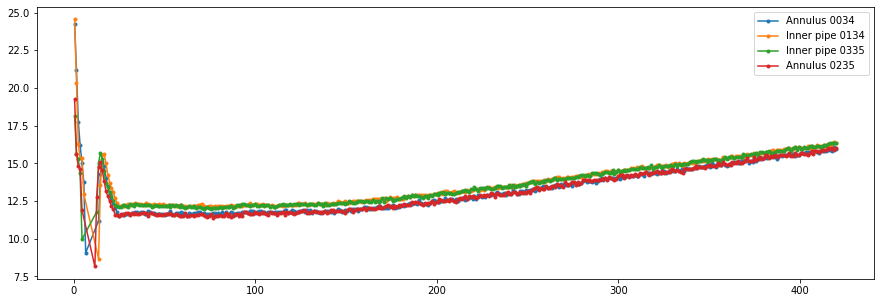

In [26]:
fig = plt.figure(figsize=(15,5))
for i in files:
    df = cleanup(pd.read_csv(i,encoding = "ISO-8859-1",skiprows = 25,sep='\t'))
    if int(i[8]) % 2 == 0 :
        plt.plot(df.index.values,df['temperature (°C)'],marker = '.',label='Inner pipe ' + i[21:25])
    else:
        plt.plot(df.index.values,df['temperature (°C)'],marker = '.',label='Annulus '+ i[21:25])
plt.legend()

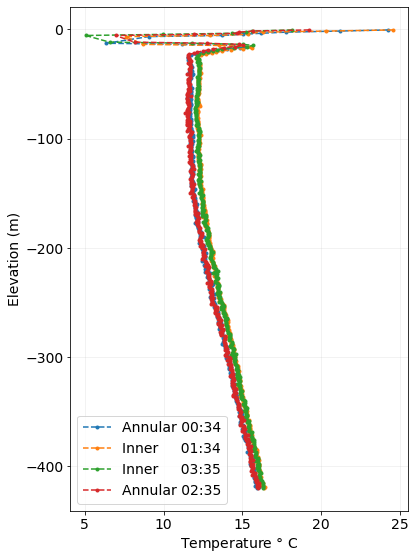

In [67]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(6,8))
for i in files:
    df = cleanup(pd.read_csv(i,encoding = "ISO-8859-1",skiprows = 25,sep='\t'))
    if int(i[8]) % 2 == 0 :
        plt.plot(df['temperature (°C)'],-df.index.values, linestyle='--',marker = '.',label='Inner     ' + i[21:23]+':'+i[23:25])
    else:
        plt.plot(df['temperature (°C)'],-df.index.values, linestyle='--',marker = '.',label='Annular '+ i[21:23]+':'+i[23:25])

plt.grid(True,alpha=0.2)
plt.ylabel('Elevation (m)')        
plt.xlabel('Temperature $\degree$ C')        
plt.legend()
plt.tight_layout()
fig.savefig('fours.png',dpi=150)

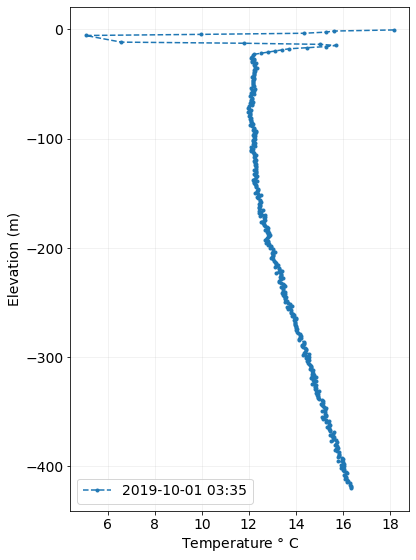

In [66]:
fig = plt.figure(figsize=(6,8))

i = files[2]
df = cleanup(pd.read_csv(i,encoding = "ISO-8859-1",skiprows = 25,sep='\t'))
plt.plot(df['temperature (°C)'],-df.index.values, linestyle='--',marker = '.',label='2019-10-01 ' + i[21:23]+':'+i[23:25])
plt.grid(True,alpha=0.2)
plt.ylabel('Elevation (m)')        
plt.xlabel('Temperature $\degree$ C')        
plt.legend()
plt.tight_layout()
fig.savefig('oct.png',dpi=150)

In [57]:
df1 = pd.read_csv(files[0],encoding = "ISO-8859-1",skiprows = 25,sep='\t')
df2 = pd.read_csv(files[1],encoding = "ISO-8859-1",skiprows = 25,sep='\t')

In [58]:
df1 = df1[df1['length (m)']>0]
df1 = df1[df1['length (m)']<420]
df2 = df2[df2['length (m)']>0]
df2 = df2[df2['length (m)']<420]
df1 = df1[df1['temperature (°C)']>12]
df2 = df2[df2['temperature (°C)']>12]

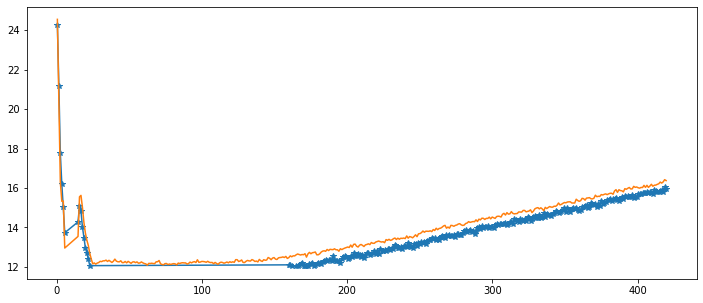

In [59]:
fig = plt.figure(figsize=(12,5))
plt.plot(df1['length (m)'],df1['temperature (°C)'],marker = '*')
plt.plot(df2['length (m)'],df2['temperature (°C)'])

In [33]:
df1.tail()

,length (m),temperature (°C),Stokes,anti-Stokes
1149,418.569,16.330,1045.429,781.380
1150,419.584,16.340,1044.380,780.572
1151,420.599,16.341,1043.949,780.186
1152,421.613,103.912,1328.973,1478.723
1153,422.628,95.349,1370.448,1478.811
